In [1]:
import SimpleITK as sitk
from platipy.imaging import ImageVisualiser

from platipy.imaging.registration.linear import linear_registration

In [2]:
img_ct_lung_5 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_0_CT_NON_CONTRAST_CHEST_5.nii.gz")
img_ct_lung_10 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_1_CT_NON_CONTRAST_CHEST_10.nii.gz")

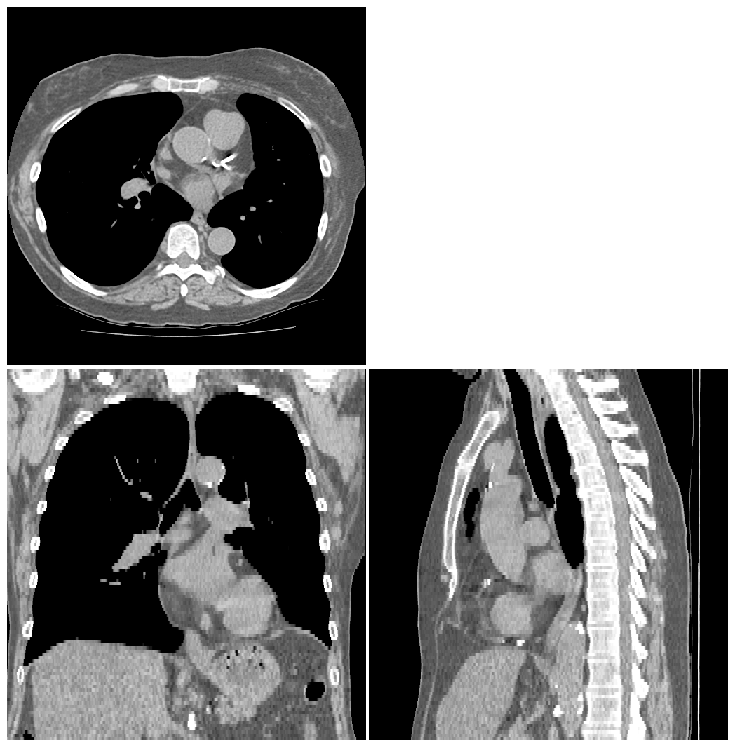

In [3]:
vis = ImageVisualiser(img_ct_lung_5)
fig = vis.show()

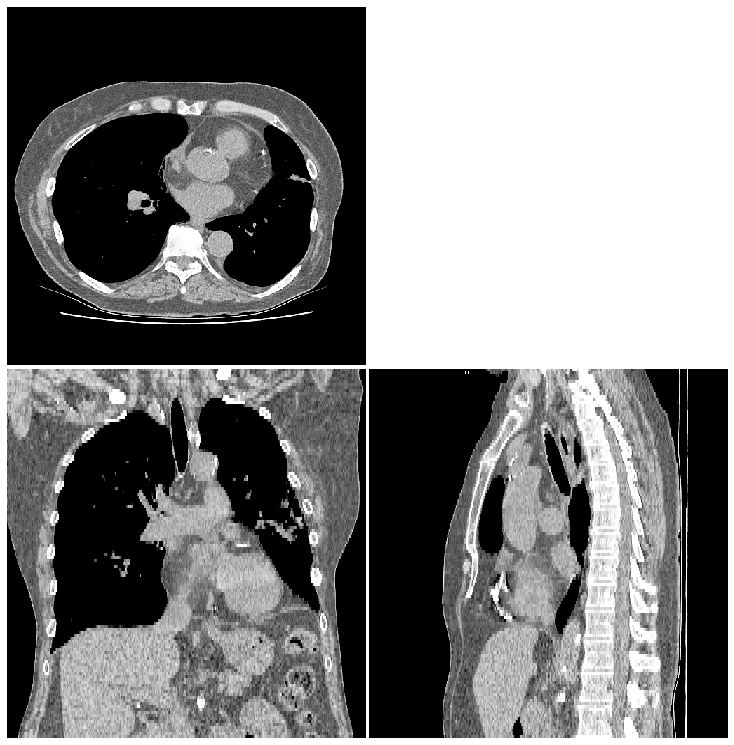

In [4]:
vis = ImageVisualiser(img_ct_lung_10)
fig = vis.show()

In [10]:
linear_registration?

Signature:
linear_registration(
    fixed_image,
    moving_image,
    fixed_structure=None,
    moving_structure=None,
    reg_method='similarity',
    metric='mean_squares',
    optimiser='gradient_descent',
    shrink_factors=[8, 2, 1],
    smooth_sigmas=[4, 2, 0],
    sampling_rate=0.25,
    final_interp=2,
    number_of_iterations=50,
    default_value=-1000,
    verbose=False,
)
Docstring:
Initial linear registration between two images.
The images are not required to be in the same space.
There are several transforms available, with options for the metric and optimiser to be used.
Note the default_value, which should be set to match the image modality.

Args:
    fixed_image ([SimpleITK.Image]): The fixed (target/primary) image.
    moving_image ([SimpleITK.Image]): The moving (secondary) image.
    fixed_structure (bool, optional): If defined, a binary SimpleITK.Image used to mask metric
                                      evaluation for the moving image. Defaults to False.
  

In [16]:
img_ct, tfm = linear_registration(
    img_ct_lung_5,
    img_ct_lung_10,
    shrink_factors=[8],
    smooth_sigmas=[10],
    reg_method='rigid',
    verbose = False
)


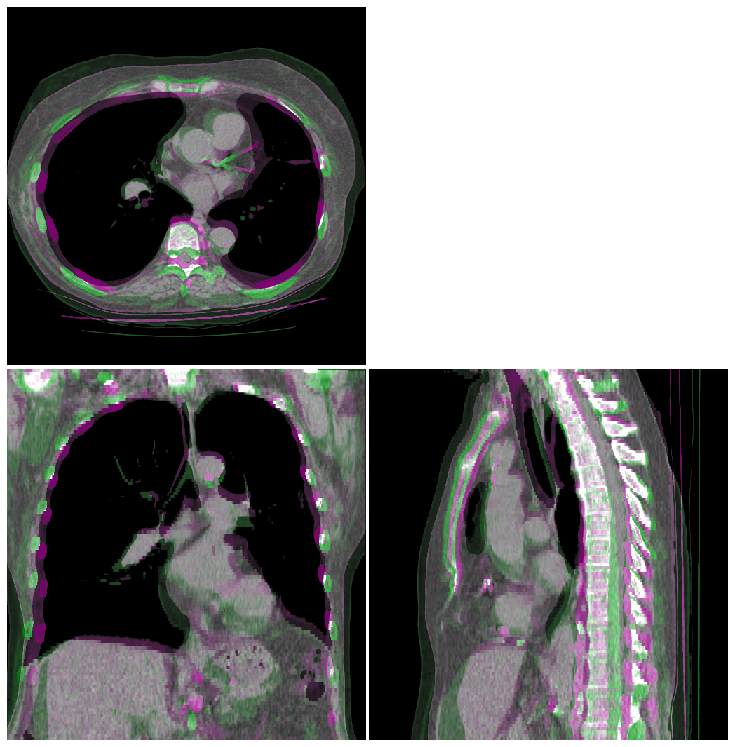

In [13]:
vis = ImageVisualiser(img_ct_lung_5)
vis.add_comparison_overlay(img_ct)
fig = vis.show()